In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:95% !important; }</style>"))
 
#여백 줄이기
display(HTML("<style>.prompt { min-width: 1ex !important; }</style>"))
 
#In 부분 없애기
#display(HTML("<style>.prompt bdi { display:none !important; }</style>"))
 
#아예 다 없애기
#display(HTML("<style>.prompt { display:none !important; }</style>"))

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 10)

In [33]:
df = pd.read_csv("./df_customer_buy_record1_2_onoff_rct_no.csv", low_memory=False, index_col=0)
df

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
0,M000034966,여성,40대,Z07,140200.0,...,0.0,0.0,off,0.0,12.0
1,M000059535,여성,30대,Z12,0.0,...,0.0,0.0,0,0.0,0.0
2,M000136117,여성,30대,Z11,27029360.0,...,298800.0,17.0,on_off,6.0,64.0
3,M000201112,여성,50대,Z17,0.0,...,0.0,0.0,off,0.0,5.0
4,M000225114,여성,40대,Z17,1923960.0,...,0.0,0.0,off,0.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,0.0,...,0.0,0.0,0,0.0,0.0
29909,M999770689,여성,30대,Z16,247900.0,...,72160.0,23.0,on_off,5.0,117.0
29910,M999849895,여성,20대,Z04,716950.0,...,0.0,0.0,off,0.0,34.0
29911,M999926092,남성,30대,Z08,0.0,...,0.0,0.0,0,0.0,0.0


In [32]:
df

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
0,M000034966,여성,40대,Z07,140200.0,...,0.0,0.0,off,0.0,12.0
1,M000059535,여성,30대,Z12,0.0,...,0.0,0.0,0,0.0,0.0
2,M000136117,여성,30대,Z11,27029360.0,...,298800.0,17.0,on_off,6.0,64.0
3,M000201112,여성,50대,Z17,0.0,...,0.0,0.0,off,0.0,5.0
4,M000225114,여성,40대,Z17,1923960.0,...,0.0,0.0,off,0.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,0.0,...,0.0,0.0,0,0.0,0.0
29909,M999770689,여성,30대,Z16,247900.0,...,72160.0,23.0,on_off,5.0,117.0
29910,M999849895,여성,20대,Z04,716950.0,...,0.0,0.0,off,0.0,34.0
29911,M999926092,남성,30대,Z08,0.0,...,0.0,0.0,0,0.0,0.0


In [34]:
#온, 오프라인 차이 보여주기

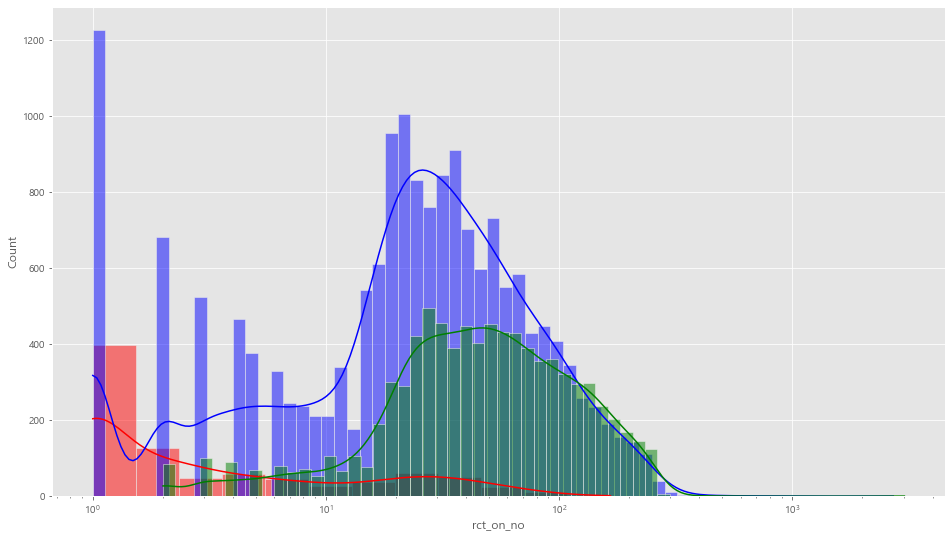

In [39]:
sns.histplot(df[df['on_off_seg']=="on"]['rct_on_no'], color='red', alpha=0.5, kde=True, log_scale=True)
sns.histplot(df[df['on_off_seg']=="off"]['rct_off_no'], color='blue', alpha=0.5, kde=True, log_scale=True)
sns.histplot(df[df['on_off_seg']=="on_off"]['rct_off_no']+df[df['on_off_seg']=="on_off"]['rct_on_no'], color='green', alpha=0.5, kde=True, log_scale=True,)
plt.show()

In [40]:
from scipy.stats import kstest
import numpy as np

test_stat = kstest(df[df['on_off_seg']=="on"]['rct_on_no'],df[df['on_off_seg']=="off"]['rct_off_no'])
test_stat


KstestResult(statistic=0.5275249671793703, pvalue=2.8364226467784507e-220)

In [41]:
test_stat = kstest(df[df['on_off_seg']=="on"]['rct_on_no'],df[df['on_off_seg']=="on_off"]['rct_off_no']+df[df['on_off_seg']=="on_off"]['rct_on_no'])
test_stat


KstestResult(statistic=0.704151643468053, pvalue=8.10056355327049e-10)

In [42]:
test_stat = kstest(df[df['on_off_seg']=="off"]['rct_off_no'] ,df[df['on_off_seg']=="on_off"]['rct_off_no']+df[df['on_off_seg']=="on_off"]['rct_on_no'])
test_stat

KstestResult(statistic=0.24852106554001524, pvalue=2.4751415919e-313)

In [116]:
df

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
0,M000034966,여성,40대,Z07,140200.0,...,0.0,0.0,off,0.0,12.0
1,M000059535,여성,30대,Z12,0.0,...,0.0,0.0,0,0.0,0.0
2,M000136117,여성,30대,Z11,27029360.0,...,298800.0,17.0,on_off,6.0,64.0
3,M000201112,여성,50대,Z17,0.0,...,0.0,0.0,off,0.0,5.0
4,M000225114,여성,40대,Z17,1923960.0,...,0.0,0.0,off,0.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...
29908,M999708287,여성,40대,Z10,0.0,...,0.0,0.0,0,0.0,0.0
29909,M999770689,여성,30대,Z16,247900.0,...,72160.0,23.0,on_off,5.0,117.0
29910,M999849895,여성,20대,Z04,716950.0,...,0.0,0.0,off,0.0,34.0
29911,M999926092,남성,30대,Z08,0.0,...,0.0,0.0,0,0.0,0.0


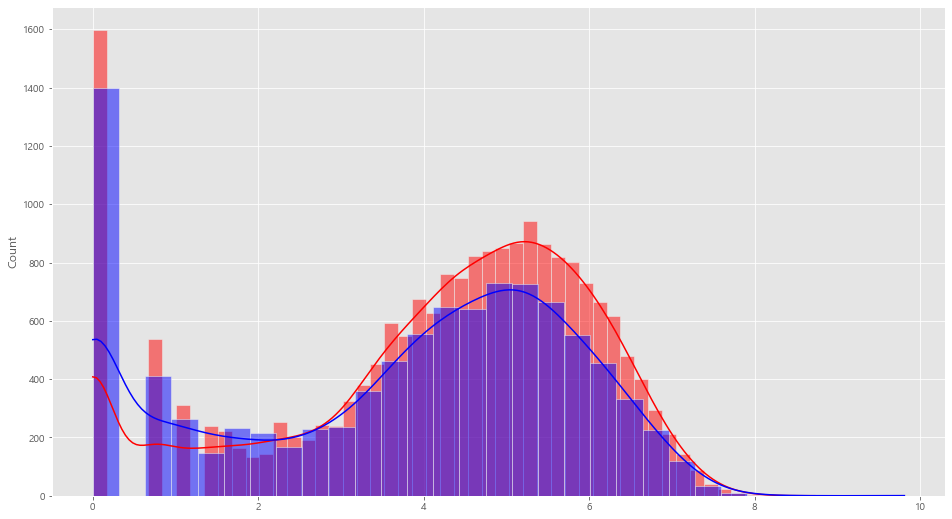

In [128]:
sns.histplot((df[df['ma_fem_dv']=='여성']['buy_ct_total_1_on'] + df[df['ma_fem_dv']=='여성']['buy_ct_total_1_off']).apply(lambda x: np.log(x+1)), kde=True, alpha=0.5, color='red')
sns.histplot((df[df['ma_fem_dv']=='남성']['buy_ct_total_1_on'] + df[df['ma_fem_dv']=='남성']['buy_ct_total_1_off']).apply(lambda x: np.log(x+1)), kde=True, alpha=0.5, color='blue')
plt.show()

In [117]:
df.columns

Index(['cust', 'ma_fem_dv', 'ages', 'zon_hlv', 'buy_am_A01_off',
       'buy_ct_A01_off', 'buy_am_A02_off', 'buy_ct_A02_off', 'buy_am_A03_off',
       'buy_ct_A03_off', 'buy_am_A04_off', 'buy_ct_A04_off', 'buy_am_A05_off',
       'buy_ct_A05_off', 'buy_am_A06_off', 'buy_ct_A06_off',
       'buy_am_total_1_off', 'buy_ct_total_1_off', 'buy_am_A01_on',
       'buy_ct_A01_on', 'buy_am_A02_on', 'buy_ct_A02_on', 'buy_am_A03_on',
       'buy_ct_A03_on', 'buy_am_A04_on', 'buy_ct_A04_on', 'buy_am_A05_on',
       'buy_ct_A05_on', 'buy_am_A06_on', 'buy_ct_A06_on', 'buy_am_total_1_on',
       'buy_ct_total_1_on', 'on_off_seg', 'rct_on_no', 'rct_off_no'],
      dtype='object')

In [63]:
df_0 = df[df['on_off_seg']=='0']
df_0
#고객정보에는 있지만 구매 기록은 없는 사람들 2996명 -> useless

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
1,M000059535,여성,30대,Z12,0.0,...,0.0,0.0,0,0.0,0.0
13,M000608261,남성,30대,Z17,0.0,...,0.0,0.0,0,0.0,0.0
21,M000965026,남성,40대,Z17,0.0,...,0.0,0.0,0,0.0,0.0
25,M001225335,여성,40대,Z17,0.0,...,0.0,0.0,0,0.0,0.0
65,M002644538,여성,40대,Z17,0.0,...,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29874,M998572907,남성,50대,Z03,0.0,...,0.0,0.0,0,0.0,0.0
29900,M999428656,남성,30대,Z15,0.0,...,0.0,0.0,0,0.0,0.0
29904,M999493501,남성,50대,Z03,0.0,...,0.0,0.0,0,0.0,0.0
29908,M999708287,여성,40대,Z10,0.0,...,0.0,0.0,0,0.0,0.0


### off

In [77]:
df_off = df[df['on_off_seg']=='off']
df_off
#off만 이용하는 사람 17451명



,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
0,M000034966,여성,40대,Z07,140200.0,...,0.0,0.0,off,0.0,12.0
3,M000201112,여성,50대,Z17,0.0,...,0.0,0.0,off,0.0,5.0
4,M000225114,여성,40대,Z17,1923960.0,...,0.0,0.0,off,0.0,78.0
5,M000261625,여성,40대,Z17,6052700.0,...,0.0,0.0,off,0.0,48.0
6,M000350564,여성,60대,Z10,9630400.0,...,0.0,0.0,off,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...
29902,M999468256,여성,70대,Z06,11000.0,...,0.0,0.0,off,0.0,19.0
29903,M999492154,여성,20대,Z10,74800.0,...,0.0,0.0,off,0.0,1.0
29905,M999515910,남성,40대,Z05,3784310.0,...,0.0,0.0,off,0.0,33.0
29907,M999673157,남성,30대,Z10,2722400.0,...,0.0,0.0,off,0.0,17.0


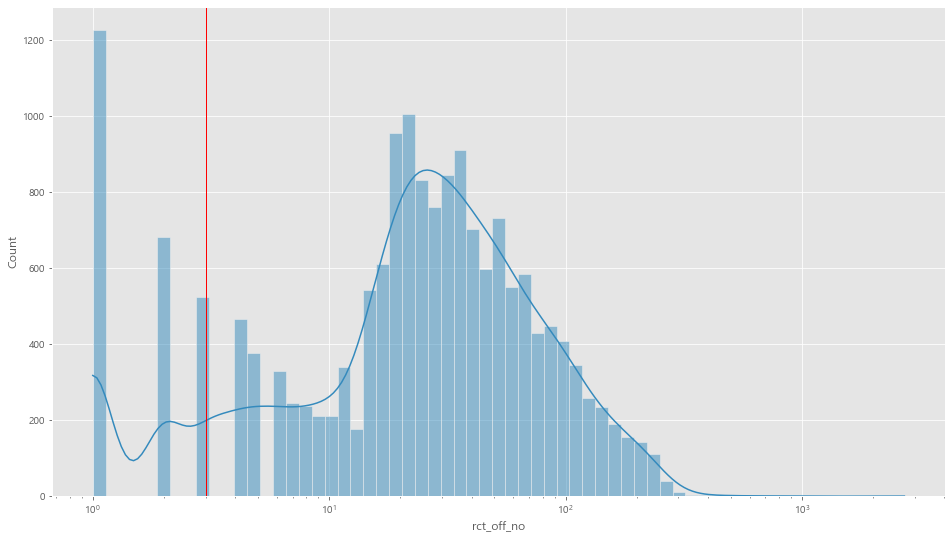

In [78]:
sns.histplot(df_off['rct_off_no'], kde=True, log_scale=True)
plt.axvline(x=3, color='r', linewidth=1)
plt.show()

In [90]:
df_off.columns

Index(['cust', 'ma_fem_dv', 'ages', 'zon_hlv', 'buy_am_A01_off',
       'buy_ct_A01_off', 'buy_am_A02_off', 'buy_ct_A02_off', 'buy_am_A03_off',
       'buy_ct_A03_off', 'buy_am_A04_off', 'buy_ct_A04_off', 'buy_am_A05_off',
       'buy_ct_A05_off', 'buy_am_A06_off', 'buy_ct_A06_off',
       'buy_am_total_1_off', 'buy_ct_total_1_off', 'buy_am_A01_on',
       'buy_ct_A01_on', 'buy_am_A02_on', 'buy_ct_A02_on', 'buy_am_A03_on',
       'buy_ct_A03_on', 'buy_am_A04_on', 'buy_ct_A04_on', 'buy_am_A05_on',
       'buy_ct_A05_on', 'buy_am_A06_on', 'buy_ct_A06_on', 'buy_am_total_1_on',
       'buy_ct_total_1_on', 'on_off_seg', 'rct_on_no', 'rct_off_no'],
      dtype='object')

In [110]:
df_off_unloyal = df_off[df_off['rct_off_no']<=3]
df_off_unloyal

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
15,M000658311,여성,20대,Z16,147500.0,...,0.0,0.0,off,0.0,1.0
17,M000713279,여성,50대,Z12,0.0,...,0.0,0.0,off,0.0,1.0
18,M000803099,여성,50대,Z03,325200.0,...,0.0,0.0,off,0.0,2.0
19,M000859319,남성,70대,Z17,0.0,...,0.0,0.0,off,0.0,1.0
23,M001080017,여성,30대,Z17,44300.0,...,0.0,0.0,off,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
29809,M996092967,여성,60대,Z16,349000.0,...,0.0,0.0,off,0.0,3.0
29827,M996679486,여성,40대,Z16,0.0,...,0.0,0.0,off,0.0,2.0
29851,M997482914,여성,40대,Z03,59000.0,...,0.0,0.0,off,0.0,2.0
29899,M999340261,남성,50대,Z11,0.0,...,0.0,0.0,off,0.0,3.0


In [111]:
df_off_loyal = df_off[df_off['rct_off_no']>3]
df_off_loyal


,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
0,M000034966,여성,40대,Z07,140200.0,...,0.0,0.0,off,0.0,12.0
3,M000201112,여성,50대,Z17,0.0,...,0.0,0.0,off,0.0,5.0
4,M000225114,여성,40대,Z17,1923960.0,...,0.0,0.0,off,0.0,78.0
5,M000261625,여성,40대,Z17,6052700.0,...,0.0,0.0,off,0.0,48.0
6,M000350564,여성,60대,Z10,9630400.0,...,0.0,0.0,off,0.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...
29901,M999441814,여성,50대,Z08,280500.0,...,0.0,0.0,off,0.0,5.0
29902,M999468256,여성,70대,Z06,11000.0,...,0.0,0.0,off,0.0,19.0
29905,M999515910,남성,40대,Z05,3784310.0,...,0.0,0.0,off,0.0,33.0
29907,M999673157,남성,30대,Z10,2722400.0,...,0.0,0.0,off,0.0,17.0


In [112]:
df_off_loyal_vip = df_off_loyal[df_off['buy_am_total_1_off']>2000000]
df_off_loyal_vip

C:\Users\LEECHO~1\AppData\Local\Temp/ipykernel_20784/1659449488.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_off_loyal_vip = df_off_loyal[df_off['buy_am_total_1_off']>2000000]


,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
5,M000261625,여성,40대,Z17,6052700.0,...,0.0,0.0,off,0.0,48.0
6,M000350564,여성,60대,Z10,9630400.0,...,0.0,0.0,off,0.0,29.0
10,M000508243,여성,50대,Z17,2492400.0,...,0.0,0.0,off,0.0,23.0
12,M000557840,남성,30대,Z11,368400.0,...,0.0,0.0,off,0.0,49.0
20,M000871427,여성,20대,Z10,1576300.0,...,0.0,0.0,off,0.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...
29879,M998763652,여성,60대,Z10,314500.0,...,0.0,0.0,off,0.0,51.0
29895,M999213998,여성,40대,Z11,277200.0,...,0.0,0.0,off,0.0,57.0
29896,M999227380,여성,40대,Z17,3449170.0,...,0.0,0.0,off,0.0,32.0
29905,M999515910,남성,40대,Z05,3784310.0,...,0.0,0.0,off,0.0,33.0


### on

In [80]:
df_on = df[df['on_off_seg']=='on']
df_on
#on만 이용하는 사람 890명



,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
24,M001086020,남성,50대,Z17,0.0,...,22800.0,1.0,on,1.0,0.0
27,M001248380,여성,30대,Z10,0.0,...,992100.0,38.0,on,38.0,0.0
119,M004610895,남성,40대,Z17,0.0,...,73000.0,1.0,on,1.0,0.0
187,M006712731,남성,40대,Z17,0.0,...,93100.0,1.0,on,1.0,0.0
197,M006962764,남성,30대,Z17,0.0,...,1085730.0,45.0,on,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29760,M994285756,남성,60대,Z10,0.0,...,130000.0,1.0,on,1.0,0.0
29766,M994550219,여성,20대,Z04,0.0,...,39500.0,1.0,on,1.0,0.0
29791,M995528586,여성,30대,Z16,0.0,...,57600.0,2.0,on,1.0,0.0
29817,M996376807,여성,30대,Z10,0.0,...,82560.0,1.0,on,1.0,0.0


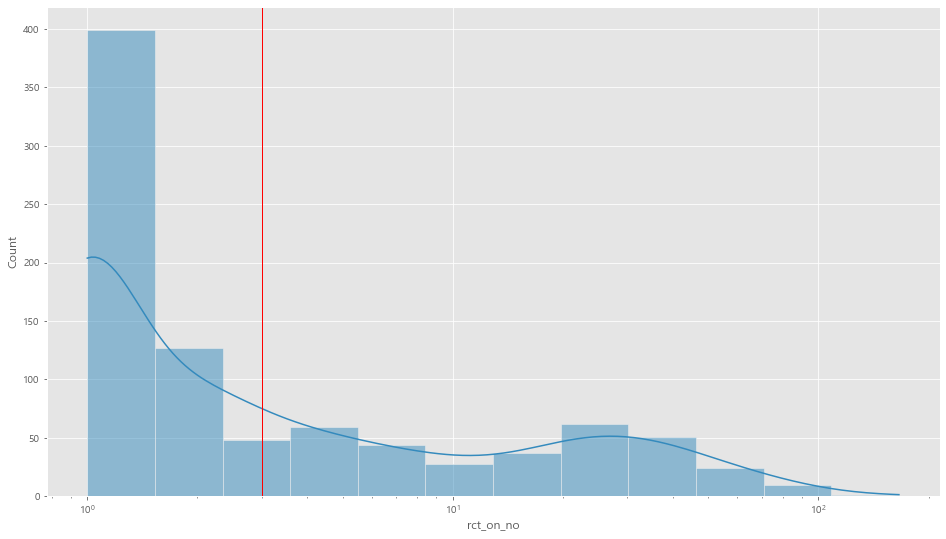

In [83]:
sns.histplot(df_on['rct_on_no'], kde=True, log_scale=True)
plt.axvline(x=3, color='r', linewidth=1)
plt.show()

In [109]:
df_on_unloyal = df_on[df_on['rct_on_no']<=3]
df_on_unloyal

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
24,M001086020,남성,50대,Z17,0.0,...,22800.0,1.0,on,1.0,0.0
119,M004610895,남성,40대,Z17,0.0,...,73000.0,1.0,on,1.0,0.0
187,M006712731,남성,40대,Z17,0.0,...,93100.0,1.0,on,1.0,0.0
198,M006976766,여성,50대,Z09,0.0,...,386470.0,4.0,on,3.0,0.0
290,M010068705,남성,30대,Z14,0.0,...,37440.0,13.0,on,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29744,M993876654,남성,30대,Z13,0.0,...,320000.0,1.0,on,1.0,0.0
29760,M994285756,남성,60대,Z10,0.0,...,130000.0,1.0,on,1.0,0.0
29766,M994550219,여성,20대,Z04,0.0,...,39500.0,1.0,on,1.0,0.0
29791,M995528586,여성,30대,Z16,0.0,...,57600.0,2.0,on,1.0,0.0


In [104]:
df_on_loyal = df_on[df_on['rct_on_no']>3]
df_on_loyal

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
27,M001248380,여성,30대,Z10,0.0,...,992100.0,38.0,on,38.0,0.0
197,M006962764,남성,30대,Z17,0.0,...,1085730.0,45.0,on,35.0,0.0
243,M008864908,남성,30대,Z04,0.0,...,968700.0,23.0,on,22.0,0.0
423,M014792007,여성,30대,Z13,0.0,...,735200.0,9.0,on,4.0,0.0
640,M021341630,여성,40대,Z07,0.0,...,2718870.0,639.0,on,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29201,M975229880,남성,50대,Z17,0.0,...,420900.0,7.0,on,7.0,0.0
29260,M976769449,여성,40대,Z17,0.0,...,594260.0,30.0,on,20.0,0.0
29548,M987731272,여성,30대,Z16,0.0,...,875560.0,239.0,on,18.0,0.0
29573,M988292446,남성,30대,Z16,0.0,...,77300.0,5.0,on,5.0,0.0


In [108]:
df_on_loyal_vip = df_on_loyal[df_on_loyal['buy_am_total_1_on']>200000]
df_on_loyal_vip

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
27,M001248380,여성,30대,Z10,0.0,...,992100.0,38.0,on,38.0,0.0
197,M006962764,남성,30대,Z17,0.0,...,1085730.0,45.0,on,35.0,0.0
243,M008864908,남성,30대,Z04,0.0,...,968700.0,23.0,on,22.0,0.0
423,M014792007,여성,30대,Z13,0.0,...,735200.0,9.0,on,4.0,0.0
640,M021341630,여성,40대,Z07,0.0,...,2718870.0,639.0,on,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
29101,M972006194,여성,30대,Z17,0.0,...,301900.0,8.0,on,4.0,0.0
29201,M975229880,남성,50대,Z17,0.0,...,420900.0,7.0,on,7.0,0.0
29260,M976769449,여성,40대,Z17,0.0,...,594260.0,30.0,on,20.0,0.0
29548,M987731272,여성,30대,Z16,0.0,...,875560.0,239.0,on,18.0,0.0


### on&off

In [82]:
df_on_off = df[df['on_off_seg']=='on_off']
df_on_off
#on, off 이용하는 사람 8576명

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
2,M000136117,여성,30대,Z11,27029360.0,...,298800.0,17.0,on_off,6.0,64.0
8,M000494848,여성,30대,Z10,23229060.0,...,1683050.0,82.0,on_off,16.0,144.0
14,M000621637,여성,40대,Z11,15467950.0,...,1232180.0,22.0,on_off,12.0,125.0
22,M000986912,여성,30대,Z10,334900.0,...,81300.0,27.0,on_off,5.0,43.0
28,M001332751,여성,30대,Z06,0.0,...,60900.0,1.0,on_off,1.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...
29891,M999105944,남성,30대,Z10,46000.0,...,15300.0,2.0,on_off,2.0,17.0
29893,M999180761,남성,30대,Z17,741100.0,...,20000.0,1.0,on_off,1.0,30.0
29906,M999599111,여성,40대,Z04,0.0,...,1180900.0,2.0,on_off,2.0,6.0
29909,M999770689,여성,30대,Z16,247900.0,...,72160.0,23.0,on_off,5.0,117.0


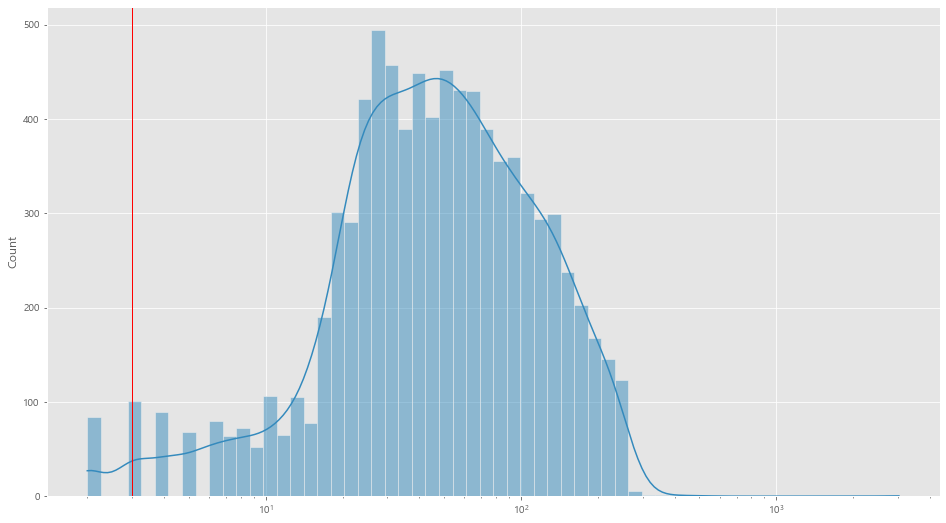

In [84]:
sns.histplot(df_on_off['rct_on_no']+df['rct_off_no'], kde=True, log_scale=True)
plt.axvline(x=3, color='r', linewidth=1)
plt.show()

In [113]:
df_on_off_unloyal = df_on_off[df_on_off['rct_on_no']+df['rct_off_no']<=3]
df_on_off_unloyal

C:\Users\LEECHO~1\AppData\Local\Temp/ipykernel_20784/3927923210.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_on_off_unloyal = df_on_off[df_on_off['rct_on_no']+df['rct_off_no']<=3]


,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
67,M002867247,여성,40대,Z10,279000.0,...,31800.0,2.0,on_off,1.0,1.0
452,M015605443,여성,50대,Z17,249000.0,...,151600.0,2.0,on_off,2.0,1.0
1092,M036019761,여성,20대,Z06,36900.0,...,92000.0,1.0,on_off,1.0,1.0
1518,M050323508,여성,30대,Z17,0.0,...,34800.0,1.0,on_off,1.0,1.0
1636,M054351548,여성,20대,Z06,95000.0,...,60000.0,1.0,on_off,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
29207,M975506549,남성,30대,Z17,0.0,...,85000.0,1.0,on_off,1.0,1.0
29444,M983748971,여성,30대,Z10,0.0,...,19400.0,1.0,on_off,1.0,2.0
29513,M986339107,여성,30대,Z10,1000000.0,...,66000.0,2.0,on_off,1.0,1.0
29544,M987624864,남성,30대,Z14,0.0,...,47400.0,1.0,on_off,1.0,1.0


In [114]:
df_on_off_loyal = df_on_off[df_on_off['rct_on_no']+df['rct_off_no']>3]
df_on_off_loyal

C:\Users\LEECHO~1\AppData\Local\Temp/ipykernel_20784/576347.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_on_off_loyal = df_on_off[df_on_off['rct_on_no']+df['rct_off_no']>3]


,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
2,M000136117,여성,30대,Z11,27029360.0,...,298800.0,17.0,on_off,6.0,64.0
8,M000494848,여성,30대,Z10,23229060.0,...,1683050.0,82.0,on_off,16.0,144.0
14,M000621637,여성,40대,Z11,15467950.0,...,1232180.0,22.0,on_off,12.0,125.0
22,M000986912,여성,30대,Z10,334900.0,...,81300.0,27.0,on_off,5.0,43.0
28,M001332751,여성,30대,Z06,0.0,...,60900.0,1.0,on_off,1.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...
29891,M999105944,남성,30대,Z10,46000.0,...,15300.0,2.0,on_off,2.0,17.0
29893,M999180761,남성,30대,Z17,741100.0,...,20000.0,1.0,on_off,1.0,30.0
29906,M999599111,여성,40대,Z04,0.0,...,1180900.0,2.0,on_off,2.0,6.0
29909,M999770689,여성,30대,Z16,247900.0,...,72160.0,23.0,on_off,5.0,117.0


In [115]:
df_on_off_loyal_vip = df_on_off_loyal[df_on_off_loyal['buy_am_total_1_on'] + df_on_off_loyal['buy_am_total_1_off'] > 200000]
df_on_off_loyal_vip

,cust,ma_fem_dv,ages,zon_hlv,buy_am_A01_off,...,buy_am_total_1_on,buy_ct_total_1_on,on_off_seg,rct_on_no,rct_off_no
2,M000136117,여성,30대,Z11,27029360.0,...,298800.0,17.0,on_off,6.0,64.0
8,M000494848,여성,30대,Z10,23229060.0,...,1683050.0,82.0,on_off,16.0,144.0
14,M000621637,여성,40대,Z11,15467950.0,...,1232180.0,22.0,on_off,12.0,125.0
22,M000986912,여성,30대,Z10,334900.0,...,81300.0,27.0,on_off,5.0,43.0
28,M001332751,여성,30대,Z06,0.0,...,60900.0,1.0,on_off,1.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...
29888,M999048029,여성,40대,Z16,1826780.0,...,1192200.0,22.0,on_off,10.0,46.0
29893,M999180761,남성,30대,Z17,741100.0,...,20000.0,1.0,on_off,1.0,30.0
29906,M999599111,여성,40대,Z04,0.0,...,1180900.0,2.0,on_off,2.0,6.0
29909,M999770689,여성,30대,Z16,247900.0,...,72160.0,23.0,on_off,5.0,117.0


In [130]:
df_buy_record = pd.read_csv("./LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv", low_memory=False)
df_buy_record

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1
...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381739,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381740,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1
4381741,M533286446,E06052119978,2,A06,NaN,PD0507,20211231,23,50000.0,1


In [133]:
df_buy_record.groupby('cust')['pd_c'].apply(list)

cust
M000034966    [PD0777, PD0777, PD0796, PD0816, PD0630, PD063...
M000136117    [PD1764, PD0957, PD0640, PD0964, PD0964, PD096...
M000201112    [PD1173, PD1333, PD0370, PD0529, PD0498, PD035...
M000225114    [PD0232, PD0232, PD0232, PD1170, PD1170, PD168...
M000261625    [PD1919, PD1922, PD1919, PD1824, PD1839, PD168...
                                    ...                        
M999599111    [PD0346, PD0411, PD1486, PD1503, PD1529, PD142...
M999673157    [PD0240, PD1689, PD0240, PD1741, PD1885, PD188...
M999770689    [PD0868, PD1644, PD1689, PD0218, PD1689, PD168...
M999849895    [PD0288, PD0288, PD0288, PD0288, PD0288, PD028...
M999962961    [PD0965, PD0977, PD0965, PD1645, PD0959, PD176...
Name: pd_c, Length: 26917, dtype: object

In [135]:
df_about_item = pd.read_csv("./LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv", low_memory=False)
df_about_item

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구
...,...,...,...,...
1928,PD1929,여성향수,화장품/뷰티케어,향수
1929,PD1930,남성향수,화장품/뷰티케어,향수
1930,PD1931,남녀공용향수,화장품/뷰티케어,향수
1931,PD1932,남성향수세트,화장품/뷰티케어,향수


In [136]:
df_buy_record_about_item = pd.merge(df_buy_record, df_about_item, on='pd_c', how='left')
df_buy_record_about_item

,cust,rct_no,chnl_dv,cop_c,br_c,...,buy_am,buy_ct,pd_nm,clac_hlv_nm,clac_mcls_nm
0,M430112881,A01000001113,1,A01,A010039,...,15000.0,1,남성티셔츠,남성의류,남성의류상의
1,M646853852,A01000002265,1,A01,A010025,...,79700.0,1,기타주방일회용품,주방잡화,주방일회용품
2,M430112881,A01000003148,1,A01,A010039,...,19000.0,1,남성티셔츠,남성의류,남성의류상의
3,M430112881,A01000003148,1,A01,A010039,...,19000.0,1,남성티셔츠,남성의류,남성의류상의
4,M430112881,A01000004946,1,A01,A010039,...,19000.0,1,남성티셔츠,남성의류,남성의류상의
...,...,...,...,...,...,...,...,...,...,...,...
4381738,M533286446,E06052119978,2,A06,NaN,...,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권
4381739,M533286446,E06052119978,2,A06,NaN,...,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권
4381740,M533286446,E06052119978,2,A06,NaN,...,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권
4381741,M533286446,E06052119978,2,A06,NaN,...,50000.0,1,백화점/마트모바일상품권,상품권,모바일상품권


In [139]:
df_wt = df_buy_record_about_item[['cust','rct_no','clac_hlv_nm']]
df_wt

,cust,rct_no,clac_hlv_nm
0,M430112881,A01000001113,남성의류
1,M646853852,A01000002265,주방잡화
2,M430112881,A01000003148,남성의류
3,M430112881,A01000003148,남성의류
4,M430112881,A01000004946,남성의류
...,...,...,...
4381738,M533286446,E06052119978,상품권
4381739,M533286446,E06052119978,상품권
4381740,M533286446,E06052119978,상품권
4381741,M533286446,E06052119978,상품권


In [140]:
df_wt.groupby('cust')['clac_hlv_nm'].apply(list)

cust
M000034966    [스포츠패션, 스포츠패션, 스포츠패션, 스포츠패션, 속옷/양말/홈웨어, 속옷/양말/...
M000136117    [패션잡화, 여성의류, 속옷/양말/홈웨어, 여성의류, 여성의류, 여성의류, 퍼스널케...
M000201112    [음료, 주류, 냉장식품, 생활/렌탈서비스, 병통조림, 냉장식품, 주류, 대용식, ...
M000225114    [과자, 과자, 과자, 음료, 음료, 테넌트/음식점, 테넌트/음식점, 냉동식품, 테...
M000261625    [화장품/뷰티케어, 화장품/뷰티케어, 화장품/뷰티케어, 패션잡화, 퍼스널케어, 테넌...
                                    ...                        
M999599111    [냉장/세탁가전, 대용식, 축산물, 축산물, 축산물, 채소, 유제품, 축산물, 유제...
M999673157    [과자, 테넌트/음식점, 과자, 패션잡화, 화장품/뷰티케어, 화장품/뷰티케어, 기타...
M999770689    [식기/조리기구, 커피/차, 테넌트/음식점, 과자, 테넌트/음식점, 테넌트/음식점,...
M999849895    [기타(비상품), 기타(비상품), 기타(비상품), 기타(비상품), 기타(비상품), ...
M999962961    [여성의류, 여성의류, 여성의류, 커피/차, 여성의류, 패션잡화, 패션잡화, 패션잡...
Name: clac_hlv_nm, Length: 26917, dtype: object

In [145]:
df_temp = pd.pivot_table(data=df_wt,
              index="cust",
              columns="clac_hlv_nm",
              values = "rct_no",
              aggfunc = "count",
              fill_value=0)

In [152]:
df_ttemp = df_temp.merge(df[["cust","ma_fem_dv"]], how="left", on="cust")
df_ttemp

,cust,가구,건강식품,건강용품,건해산물,...,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어,ma_fem_dv
0,M000034966,0,0,0,1,...,0,0,0,0,여성
1,M000136117,0,0,0,0,...,9,3,3,2,여성
2,M000201112,0,0,0,0,...,0,0,0,0,여성
3,M000225114,0,0,0,0,...,4,0,0,7,여성
4,M000261625,0,0,0,0,...,3,7,0,27,여성
...,...,...,...,...,...,...,...,...,...,...,...
26912,M999599111,0,1,0,1,...,0,0,0,0,여성
26913,M999673157,0,0,0,0,...,1,0,0,2,남성
26914,M999770689,0,2,1,0,...,2,0,0,0,여성
26915,M999849895,0,0,1,0,...,3,0,0,0,여성


In [154]:
df_fpr = df_ttemp.loc[df_ttemp["ma_fem_dv"]=="여성"]
df_mpr = df_ttemp.loc[df_ttemp["ma_fem_dv"]=="남성"]

In [156]:
len(df_fpr.columns)

62

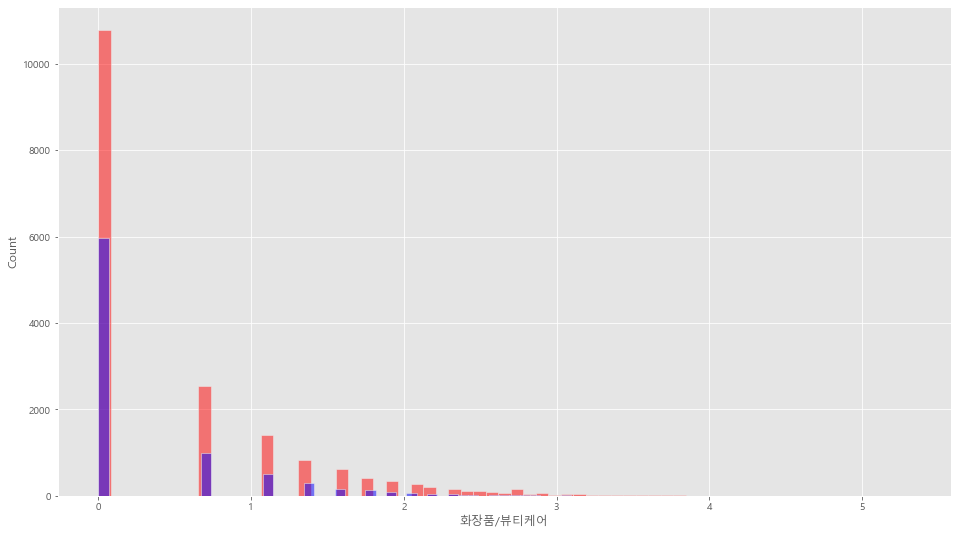

In [164]:
sns.histplot(df_fpr["화장품/뷰티케어"].apply(lambda x:np.log(x+1)), color="red", alpha=.5)
sns.histplot(df_mpr["화장품/뷰티케어"].apply(lambda x:np.log(x+1)), color="blue", alpha=.5)
plt.show()

In [170]:
df_pdde = pd.read_csv("./LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv", low_memory=False)
df_cust = pd.read_csv("./LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv")
df_pdde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381743 entries, 0 to 4381742
Data columns (total 10 columns):
 #   Column   Dtype  
---  ------   -----  
 0   cust     object 
 1   rct_no   object 
 2   chnl_dv  int64  
 3   cop_c    object 
 4   br_c     object 
 5   pd_c     object 
 6   de_dt    int64  
 7   de_hr    int64  
 8   buy_am   float64
 9   buy_ct   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 334.3+ MB


In [171]:
df_pdde.groupby("cust")["chnl_dv"].apply(set)

cust
M000034966       {1}
M000136117    {1, 2}
M000201112       {1}
M000225114       {1}
M000261625       {1}
               ...  
M999599111    {1, 2}
M999673157       {1}
M999770689    {1, 2}
M999849895       {1}
M999962961    {1, 2}
Name: chnl_dv, Length: 26917, dtype: object

# 함수화

In [ ]:
# 누락 데이터 삭제
def check_on_off(df_main, df, key="cust", col_nm="chnl_dv"):
    df_new = pd.DataFrame(df.groupby(key)[col_nm].apply(lambda x:list(set(x))))
    return df_main.merge(df_new, how="left", on=key).dropna(subset=["chnl_dv"])

# on/off 분류
def split_on_off(df, col_nm="chnl_dv"):
    df[col_nm] = df[col_nm].apply(lambda x: x[0] if len(x)==1 else 0)
    df_res1 = df.loc[df[col_nm]==1]
    df_res2 = df.loc[df[col_nm]==2]
    df_res3 = df.loc[df[col_nm]==0]
    return df_res1, df_res2, df_res3 #off, on, onf

# loyal/unloyal 분류
def split_loyal(df_main, df_sub, col_nm ='rct_no', key = 'cust'):
    
    df_rct_no = pd.DataFrame(df_sub.groupby([key])[col_nm].apply(lambda x: len(list(set(x))))).reset_index()
    df_m2 = df_main.merge(df_rct_no, how="left", on=key)
    df_loyal = df_m2.loc[df_m2[col_nm]>3]
    df_unloyal = df_m2.loc[df_m2[col_nm]<=3]
    return df_loyal, df_unloyal

# vip/unvip 분류
def split_vip(df_main, df_sub, col_nm='buy_am', key='cust'):
    
    df_buy_am = pd.DataFrame(df_sub.groupby([key])[col_nm].sum()).reset_index()
    df_m2 = df_main.merge(df_buy_am, how='left', on=key)
    df_vip = df_m2.loc[df_m2[col_nm]>200000]
    df_unvip = df_m2.loc[df_m2[col_nm]<=200000]
    return df_vip, df_unvip
    


In [266]:
df = check_on_off(df_cust, df_pdde)

df_off, df_on, df_onf = split_on_off(df)

df_01, df_2 = split_loyal(df_on, df_pdde)
df_34, df_5 = split_loyal(df_onf, df_pdde)
df_67, df_8 = split_loyal(df_off, df_pdde)

df_0, df_1 = split_vip(df_01, df_pdde)
df_3, df_4 = split_vip(df_34, df_pdde)
df_6, df_7 = split_vip(df_67, df_pdde)


In [267]:
df_0

,cust,ma_fem_dv,ages,zon_hlv,chnl_dv,rct_no,buy_am
0,M001248380,여성,30대,Z10,2,38,992100.0
1,M006962764,남성,30대,Z17,2,35,1085730.0
2,M008864908,남성,30대,Z04,2,22,968700.0
3,M014792007,여성,30대,Z13,2,4,735200.0
4,M021341630,여성,40대,Z07,2,23,2718870.0
...,...,...,...,...,...,...,...
310,M972006194,여성,30대,Z17,2,4,301900.0
311,M975229880,남성,50대,Z17,2,7,420900.0
312,M976769449,여성,40대,Z17,2,20,594260.0
313,M987731272,여성,30대,Z16,2,18,875560.0


In [268]:
df_1

,cust,ma_fem_dv,ages,zon_hlv,chnl_dv,rct_no,buy_am
6,M023543251,여성,20대,Z16,2,6,105480.0
17,M063059486,남성,50대,Z04,2,4,55120.0
29,M114374841,여성,30대,Z10,2,4,158290.0
30,M120247124,남성,30대,Z17,2,20,197080.0
44,M156591412,남성,20대,Z11,2,4,154900.0
...,...,...,...,...,...,...,...
282,M867637042,남성,30대,Z10,2,5,153300.0
284,M873044482,여성,30대,Z11,2,5,178194.0
292,M912616576,남성,30대,Z17,2,4,156160.0
302,M935051519,여성,50대,Z12,2,17,43400.0


In [269]:
df_2

,cust,ma_fem_dv,ages,zon_hlv,chnl_dv,rct_no
0,M001086020,남성,50대,Z17,2,1
2,M004610895,남성,40대,Z17,2,1
3,M006712731,남성,40대,Z17,2,1
5,M006976766,여성,50대,Z09,2,3
7,M010068705,남성,30대,Z14,2,2
...,...,...,...,...,...,...
884,M993876654,남성,30대,Z13,2,1
885,M994285756,남성,60대,Z10,2,1
886,M994550219,여성,20대,Z04,2,1
887,M995528586,여성,30대,Z16,2,1


In [273]:
df_3

,cust,ma_fem_dv,ages,zon_hlv,chnl_dv,rct_no,buy_am
0,M000136117,여성,30대,Z11,0,70,27373630.0
1,M000494848,여성,30대,Z10,0,160,25624610.0
2,M000621637,여성,40대,Z11,0,137,16702330.0
3,M000986912,여성,30대,Z10,0,48,777430.0
4,M001332751,여성,30대,Z06,0,33,2814069.0
...,...,...,...,...,...,...,...
8385,M999048029,여성,40대,Z16,0,56,3225642.0
8387,M999180761,남성,30대,Z17,0,31,806110.0
8388,M999599111,여성,40대,Z04,0,8,1484022.0
8389,M999770689,여성,30대,Z16,0,122,1187140.0


In [274]:
df_4

,cust,ma_fem_dv,ages,zon_hlv,chnl_dv,rct_no,buy_am
19,M003490042,여성,20대,Z10,0,5,103190.0
85,M010805061,여성,30대,Z12,0,7,191300.0
111,M013639641,남성,40대,Z11,0,8,175720.0
151,M017676375,여성,30대,Z17,0,21,194530.0
174,M020881880,여성,30대,Z14,0,5,134990.0
...,...,...,...,...,...,...,...
8149,M970887054,여성,20대,Z04,0,6,168000.0
8174,M973272413,여성,50대,Z16,0,4,66037.0
8303,M989380716,남성,30대,Z10,0,25,182450.0
8348,M995165674,남성,20대,Z10,0,17,124400.0


In [275]:
df_5

,cust,ma_fem_dv,ages,zon_hlv,chnl_dv,rct_no
17,M002867247,여성,40대,Z10,0,2
130,M015605443,여성,50대,Z17,0,3
314,M036019761,여성,20대,Z06,0,2
449,M050323508,여성,30대,Z17,0,2
479,M054351548,여성,20대,Z06,0,2
...,...,...,...,...,...,...
8370,M975506549,남성,30대,Z17,0,2
8437,M983748971,여성,30대,Z10,0,3
8461,M986339107,여성,30대,Z10,0,2
8468,M987624864,남성,30대,Z14,0,2


In [276]:
df_6

,cust,ma_fem_dv,ages,zon_hlv,chnl_dv,rct_no,buy_am
0,M000034966,여성,40대,Z07,1,12,654120.0
2,M000225114,여성,40대,Z17,1,78,1937700.0
3,M000261625,여성,40대,Z17,1,48,6052700.0
4,M000350564,여성,60대,Z10,1,29,9630400.0
5,M000419293,여성,40대,Z17,1,39,1833500.0
...,...,...,...,...,...,...,...
15012,M999441814,여성,50대,Z08,1,5,282200.0
15013,M999468256,여성,70대,Z06,1,19,438960.0
15014,M999515910,남성,40대,Z05,1,33,7119795.0
15015,M999673157,남성,30대,Z10,1,17,2851370.0


In [271]:
df_7

,cust,ma_fem_dv,ages,zon_hlv,chnl_dv,rct_no,buy_am
1,M000201112,여성,50대,Z17,1,5,53120.0
26,M002188008,남성,20대,Z17,1,18,71900.0
33,M003005564,여성,20대,Z17,1,5,150800.0
39,M003468477,여성,30대,Z17,1,4,118600.0
59,M005233669,여성,20대,Z05,1,11,152378.0
...,...,...,...,...,...,...,...
14887,M991249212,여성,30대,Z10,1,4,108300.0
14888,M991252837,여성,40대,Z17,1,7,76620.0
14943,M994644028,여성,40대,Z12,1,4,33550.0
14964,M996072085,여성,60대,Z08,1,10,57000.0


In [272]:
df_8

,cust,ma_fem_dv,ages,zon_hlv,chnl_dv,rct_no
10,M000658311,여성,20대,Z16,1,1
12,M000713279,여성,50대,Z12,1,1
13,M000803099,여성,50대,Z03,1,2
14,M000859319,남성,70대,Z17,1,1
16,M001080017,여성,30대,Z17,1,1
...,...,...,...,...,...,...
17395,M996092967,여성,60대,Z16,1,3
17406,M996679486,여성,40대,Z16,1,2
17421,M997482914,여성,40대,Z03,1,2
17444,M999340261,남성,50대,Z11,1,3


In [303]:
# 누락 데이터 삭제
def check_on_off(df_main, df, key="cust", col_nm="chnl_dv"):
    df_new = pd.DataFrame(df.groupby(key)[col_nm].apply(lambda x:list(set(x))))
    return df_main.merge(df_new, how="left", on=key).dropna(subset=["chnl_dv"])

# on/off 분류
def split_on_off(df, col_nm="chnl_dv"):
    df[col_nm] = df[col_nm].apply(lambda x: x[0] if len(x)==1 else 0)
    df_res1 = df.loc[df[col_nm]==1]
    df_res2 = df.loc[df[col_nm]==2]
    df_res3 = df.loc[df[col_nm]==0]
    return df_res1, df_res2, df_res3 #off, on, onf

# loyal/unloyal 분류
def split_loyal(df_main, df_sub, col_nm ='rct_no', key = 'cust'):
    
    df_rct_no = pd.DataFrame(df_sub.groupby([key])[col_nm].apply(lambda x: len(list(set(x))))).reset_index()
    df_m2 = df_main.merge(df_rct_no, how="left", on=key)
    df_loyal = df_m2.loc[df_m2[col_nm]>3]
    df_unloyal = df_m2.loc[df_m2[col_nm]<=3]
    return df_loyal, df_unloyal

# vip/unvip 분류
def split_vip(df_main, df_sub, col_nm='buy_am', key='cust'):
    
    df_buy_am = pd.DataFrame(df_sub.groupby([key],as_index=False)[col_nm].sum())
    df_m2 = df_main.merge(df_buy_am, how='left', on=key)
    df_vip = df_m2.loc[df_m2[col_nm]>200000]
    df_unvip = df_m2.loc[df_m2[col_nm]<=200000]
    return df_vip, df_unvip

def domain_clustering(df_main, df_sub):
    
    df = check_on_off(df_main, df_sub)

    df_off, df_on, df_onf = split_on_off(df)

    df_01, df_2 = split_loyal(df_on, df_sub)
    df_34, df_5 = split_loyal(df_onf, df_sub)
    df_67, df_8 = split_loyal(df_off, df_sub)

    df_0, df_1 = split_vip(df_01, df_sub)
    df_3, df_4 = split_vip(df_34, df_sub)
    df_6, df_7 = split_vip(df_67, df_sub)
    
    df_init = pd.DataFrame()
    for i, df_temp in enumerate([df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8]):
        df_temp["cluster"] = i
        df_init = pd.concat([df_init, df_temp], axis=0, ignore_index=True)
        
    return df_init[['cust', 'cluster']]


In [304]:
result = domain_clustering(df_cust, df_pdde)

In [305]:
result

,cust,cluster
0,M001248380,0
1,M006962764,0
2,M008864908,0
3,M014792007,0
4,M021341630,0
...,...,...
26912,M996092967,8
26913,M996679486,8
26914,M997482914,8
26915,M999340261,8
